In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import matplotlib.image as mimage
import random

import warnings
warnings.filterwarnings('ignore')

1) taking the data overview

In [2]:
for dir_path , dir_name , file_name in os.walk('10_food_classes_all_data'):
    print(f"there are {len(dir_name)} directories and {len(file_name)} images in {dir_path}")

there are 2 directories and 0 images in 10_food_classes_all_data
there are 2 directories and 0 images in 10_food_classes_all_data\10_food_classes_all_data
there are 10 directories and 0 images in 10_food_classes_all_data\10_food_classes_all_data\test
there are 0 directories and 250 images in 10_food_classes_all_data\10_food_classes_all_data\test\chicken_curry
there are 0 directories and 250 images in 10_food_classes_all_data\10_food_classes_all_data\test\chicken_wings
there are 0 directories and 250 images in 10_food_classes_all_data\10_food_classes_all_data\test\fried_rice
there are 0 directories and 250 images in 10_food_classes_all_data\10_food_classes_all_data\test\grilled_salmon
there are 0 directories and 250 images in 10_food_classes_all_data\10_food_classes_all_data\test\hamburger
there are 0 directories and 250 images in 10_food_classes_all_data\10_food_classes_all_data\test\ice_cream
there are 0 directories and 250 images in 10_food_classes_all_data\10_food_classes_all_data\t

In [3]:
train_dir = '10_food_classes_all_data/10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/10_food_classes_all_data/test'

In [4]:
# lets see the class name

class_name = np.array(sorted([item for item in os.listdir(train_dir)]))
class_name

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

314237.jpg


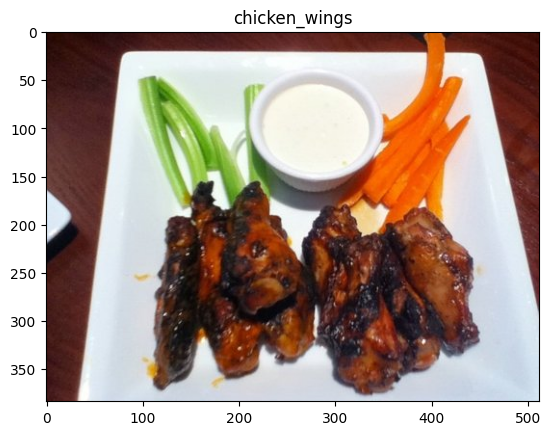

In [5]:
def plot_image(dir):
    im_path = random.choice(os.listdir(dir)) +"/"
    path = dir+im_path
    im = random.choice(os.listdir(path))
    total_path = path+im
    print(im)
    encoded_image = mimage.imread(total_path)
    plt.title(im_path.split('/')[-2])
    plt.imshow(encoded_image)
    plt.show()
   
    
plot_image(train_dir)

2) preparing the data for model building

In [31]:
#preprocess the data where we rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# here we initiallize the ImageDataGenerator for normalize the data
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1 /255.)

# now we convert our data into batches
print('training data images')
train_data = train_datagen.flow_from_directory(directory =train_dir , batch_size = 32 , 
                                target_size=(224,224) , 
                                class_mode='categorical') # beacuase we working with the categorical data which is more than one. and it is by-defualt mode

print("testing data images")
test_data = test_datagen.flow_from_directory(directory=test_dir , batch_size=32 ,# defualt batch size 32
                                             target_size=(224,224) ,
                                             class_mode ='categorical')

training data images
Found 7500 images belonging to 10 classes.
testing data images
Found 2500 images belonging to 10 classes.


3) build the baseline model 

In [32]:
# importing the neccessity
from tensorflow.keras.layers import Conv2D , Flatten , Dense , MaxPool2D ,Activation

from tensorflow.keras.utils import plot_model

from tensorflow.keras import Sequential

from tensorflow.keras.optimizers import Adam

In [33]:
model_1 = Sequential([
    Conv2D(filters=10, kernel_size=3, padding='valid', activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, padding='valid', activation='relu'),
    MaxPool2D(pool_size=2),  # Added an extra pooling layer to reduce dimensions
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(10, activation='softmax')
])


model_1.compile(loss = 'categorical_crossentropy',
            
                metrics=['accuracy'],
                optimizer=Adam(lr=0.001))

hist_1 =model_1.fit(train_data ,#train data have both value i.e x(input) , y(output)
                     validation_data=test_data , steps_per_epoch=len(train_data),
                    validation_steps=len(test_data) , epochs=5)


Epoch 1/5
235/235 [==============================] - 78s 322ms/step - loss: 2.1959 - accuracy: 0.1891 - val_loss: 2.0192 - val_accuracy: 0.2752
Epoch 2/5
235/235 [==============================] - 72s 305ms/step - loss: 1.9812 - accuracy: 0.2965 - val_loss: 1.9385 - val_accuracy: 0.3140
Epoch 3/5
235/235 [==============================] - 71s 301ms/step - loss: 1.8496 - accuracy: 0.3535 - val_loss: 1.9081 - val_accuracy: 0.3292
Epoch 4/5
235/235 [==============================] - 73s 309ms/step - loss: 1.6651 - accuracy: 0.4223 - val_loss: 1.8943 - val_accuracy: 0.3584
Epoch 5/5
235/235 [==============================] - 69s 294ms/step - loss: 1.3577 - accuracy: 0.5312 - val_loss: 1.9880 - val_accuracy: 0.3460


In [34]:
model_1.evaluate(test_data)

79/79 [==============================] - 12s 156ms/step - loss: 1.9880 - accuracy: 0.3460


[1.9880181550979614, 0.34599998593330383]

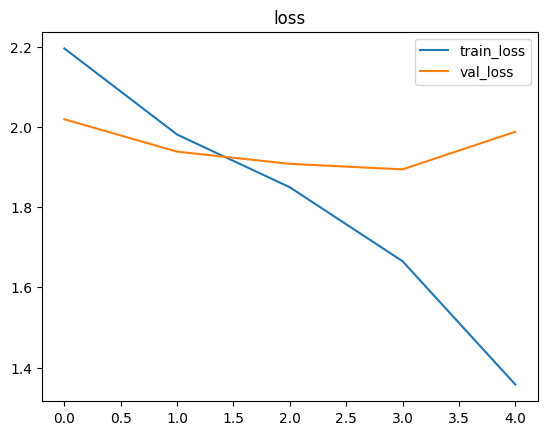

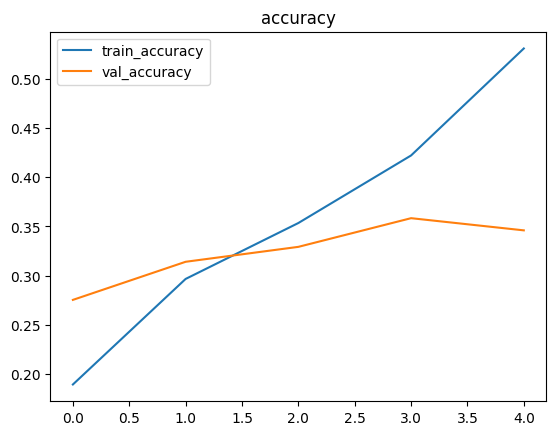

In [35]:

def loss_curve_histroy(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    val_accuracy = history.history['val_accuracy']
    accuracy = history.history['accuracy']

    epochs = range(len(history.history['loss']))

    plt.title('loss')
    plt.plot(epochs , train_loss , label='train_loss')
    plt.plot(epochs , val_loss ,label='val_loss')
    plt.legend()
    plt.show()

    plt.title('accuracy')
    plt.plot(epochs , accuracy , label='train_accuracy')
    plt.plot(epochs , val_accuracy ,label='val_accuracy')
    plt.legend()
    plt.show()

loss_curve_histroy(hist_1)

- from the graph u see that model is completely get overfitted with training data i.e it have high accuracy at training data and low accuracy in testing data.

- there are many technique to reduce it:
1) simplify the model : due to more layers model not interprey the data well 
2) add Dropout layer : use Dropout
3) data Augmentation :  increase the image by adding some noise in existing images
4) get more data : if u have chances to get more data so do that
5) use Transfer learning
6) use better data :  if u have small data but if data is useful then u can able to build better model

5) evaluate the model performance

In [36]:
# simplifying the model 
model_2 = Sequential([
    Conv2D(10 , 3  , padding='valid',activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10 ,3 ,padding='valid',activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(100,activation='relu'),
    Dense(10 , activation='softmax')

])

model_2.compile(loss='categorical_crossentropy',metrics=['accuracy'],
                optimizer=Adam(lr=0.01))

hist_2 = model_2.fit(train_data , validation_data=test_data ,epochs=5,
                     steps_per_epoch=len(train_data) , validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 72s 298ms/step - loss: 2.2027 - accuracy: 0.2136 - val_loss: 2.0804 - val_accuracy: 0.2504
Epoch 2/5
235/235 [==============================] - 73s 310ms/step - loss: 1.9556 - accuracy: 0.3077 - val_loss: 1.9676 - val_accuracy: 0.2840
Epoch 3/5
235/235 [==============================] - 69s 294ms/step - loss: 1.7766 - accuracy: 0.3920 - val_loss: 1.9258 - val_accuracy: 0.3260
Epoch 4/5
235/235 [==============================] - 66s 282ms/step - loss: 1.4518 - accuracy: 0.5124 - val_loss: 1.9960 - val_accuracy: 0.3300
Epoch 5/5
235/235 [==============================] - 68s 291ms/step - loss: 1.0231 - accuracy: 0.6649 - val_loss: 2.1967 - val_accuracy: 0.3252


In [37]:
model_2.evaluate(test_data)

79/79 [==============================] - 12s 148ms/step - loss: 2.1967 - accuracy: 0.3252


[2.196658134460449, 0.32519999146461487]

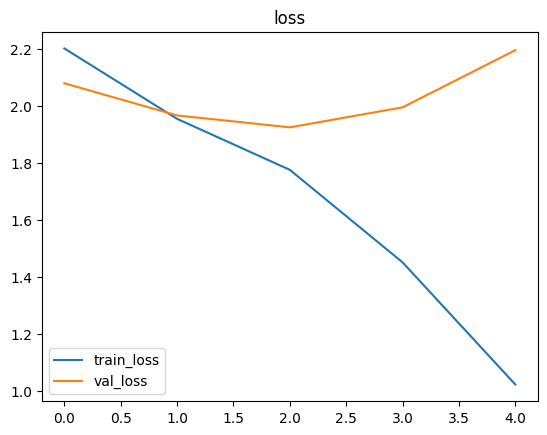

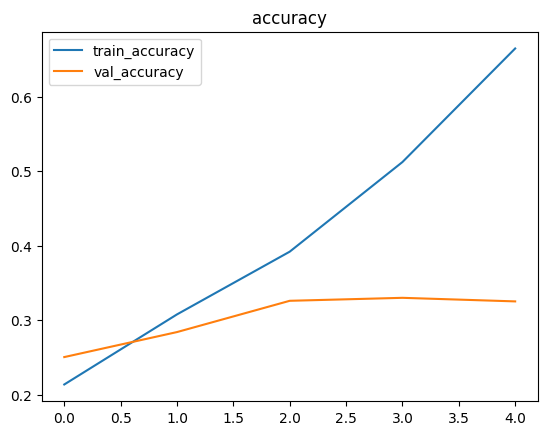

In [38]:
loss_curve_histroy(hist_2)

In [39]:
model_1.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_45 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 activation_14 (Activation)  (None, 109, 109, 10)      0         
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_46 (Conv2D)          (None, 52, 52, 10)      

In [40]:
model_2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, None, None, 10)    280       
                                                                 
 max_pooling2d_30 (MaxPooli  (None, None, None, 10)    0         
 ng2D)                                                           
                                                                 
 conv2d_48 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 max_pooling2d_31 (MaxPooli  (None, None, None, 10)    0         
 ng2D)                                                           
                                                                 
 flatten_15 (Flatten)        (None, None)              0         
                                                                 
 dense_45 (Dense)            (None, 100)             

- till model gives the poor accuracy. even though we simplify the model 
- i think model get overfitts beacuase of parameters are increasing from 2711760 (model_1 param) to 2918300 (model_2 param)


                


- lets try out data augmentation and see models performance

In [43]:
## data augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_augmentation = ImageDataGenerator(rescale=1/255.,
                                             zoom_range=0.2,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,horizontal_flip=True)

train_data_augmented = train_data_augmentation.flow_from_directory(train_dir , target_size=(224,224),batch_size=32,
                                                                   class_mode='categorical')

# u think 🤔 : train_data but this train augmented data 

Found 7500 images belonging to 10 classes.


In [53]:
# create the new model on for this data
# here we clone the model so no need to make same-model again-and-again

model_3 = tf.keras.models.clone_model(model_1)
# but we have to compile the model
model_3.compile(loss='categorical_crossentropy',
                metrics=['accuracy'],
                optimizer=Adam())


hist_3 = model_3.fit(train_data_augmented , validation_data=test_data , steps_per_epoch=len(train_data_augmented),
            validation_steps=len(test_data) , epochs=5)

Epoch 1/5
235/235 [==============================] - 178s 748ms/step - loss: 2.2562 - accuracy: 0.1540 - val_loss: 2.1722 - val_accuracy: 0.2032
Epoch 2/5
235/235 [==============================] - 177s 751ms/step - loss: 2.1841 - accuracy: 0.1801 - val_loss: 2.1285 - val_accuracy: 0.2264
Epoch 3/5
235/235 [==============================] - 177s 751ms/step - loss: 2.1153 - accuracy: 0.2308 - val_loss: 2.0049 - val_accuracy: 0.2808
Epoch 4/5
235/235 [==============================] - 174s 739ms/step - loss: 2.0366 - accuracy: 0.2709 - val_loss: 1.9878 - val_accuracy: 0.2592
Epoch 5/5
235/235 [==============================] - 174s 739ms/step - loss: 1.9842 - accuracy: 0.2960 - val_loss: 1.8338 - val_accuracy: 0.3604


In [54]:
model_3.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_45 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 activation_14 (Activation)  (None, 109, 109, 10)      0         
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_46 (Conv2D)          (None, 52, 52, 10)      

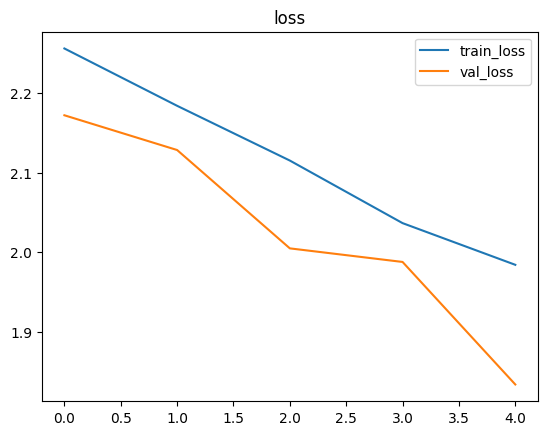

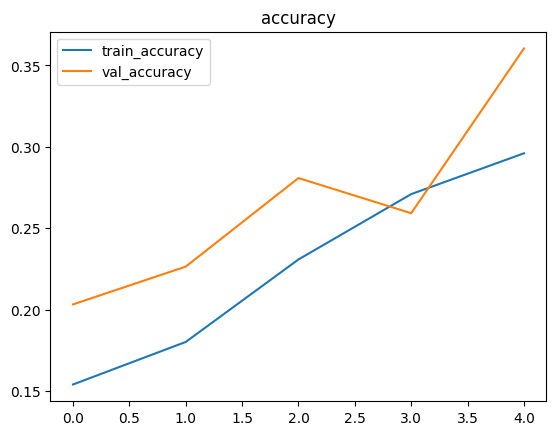

In [55]:
loss_curve_histroy(hist_3)

- by visualizing plot we say that we reduce the overfitting 
- trained it for more epoch. it is too computationally expensive not trained on jupyter train on google colab.
- it takes 178 sec (i.e 3 min per epochs 😱🥹🥹)

In [71]:
print(f"model's accuracy {model_3.evaluate(test_data)[1]} and model's loss {model_3.evaluate(test_data)[0]}")

79/79 [==============================] - 8s 98ms/step - loss: 1.8338 - accuracy: 0.3604
model's accuracy 0.36039999127388 and model's loss 1.8338242769241333


6) repeat until satisfied....
we will keep going and doing experiment untill we will not satisfied with the our result.

How?

- by runing lots of experiments like:
1) restructuring the model's architecture(increase layes / hidden units)
2) adjust the learning rate
3) try different methods of data augmentation (adjust the hyperparameter in ImageDataGenerator class instance )
4) try with different optimizers and activation function
5) try with **Transfer Learning**

- making the predictions on the test_data

1/1 [==============================] - 0s 35ms/step
['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']


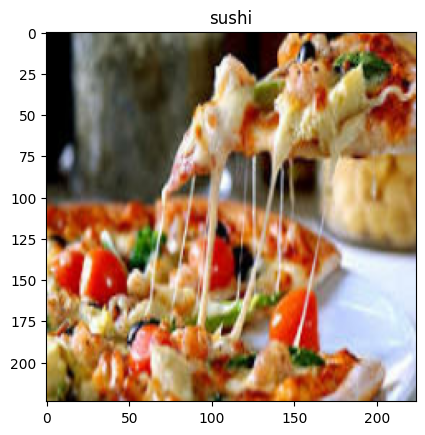

In [68]:
# lets make the functionality that simplifies make prediction
def load_prep_model(filename , img_shape=224):

    # read image from file
    img = tf.io.read_file(filename)

    # Decode the image file into tensors
    img = tf.image.decode_image(img)

    # resize the Image
    img = tf.image.resize(img , size=[img_shape,img_shape])

    # rescale the image(rescale the imge in 0 and 1)
    img  = img/255.
    return img


def models_prediction(file , model = model_3 , img_shape=244):
    img = load_prep_model(filename=file)
    y_pred = model.predict(np.expand_dims(img , axis=0))

    class_name = os.listdir(test_dir)
    #print(class_name)
    # we have to use different functionality like argmax to find appropriate class 
    if len(y_pred[0])>1:
        pred_class = class_name[tf.argmax(y_pred[0])]
    else:
        pred_class = class_name[int(tf.round(y_pred[0]))]

    plt.title(pred_class)
    plt.imshow(img)
    plt.show()  

    

models_prediction('C:/Users/rohit/Downloads/pizza.jpg'  )


- the model not perform better beacuase we didn't trained it for long time.
- till it identify best 

1/1 [==============================] - 0s 58ms/step
[[0.01367746 0.0754413  0.01312019 0.0505891  0.08382636 0.2057975
  0.0138008  0.0263282  0.46473974 0.0526794 ]]
tf.Tensor([0 0 0 0 0 0 0 0 0 0], shape=(10,), dtype=int64)


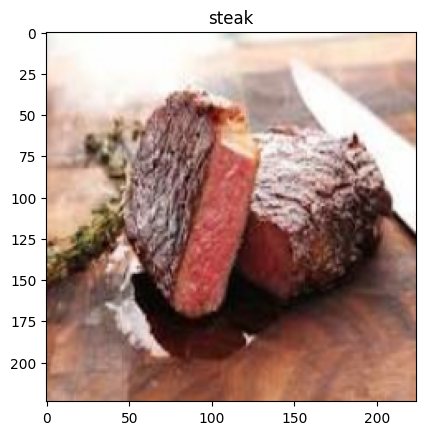

In [67]:
models_prediction('C:/Users/rohit/Downloads/steak.jpg')

1/1 [==============================] - 0s 34ms/step
['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']


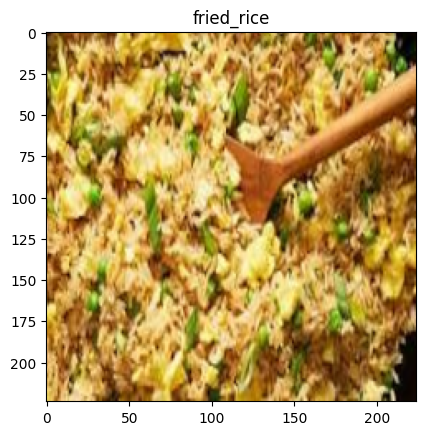

In [69]:
models_prediction('C:/Users/rohit/Downloads/fried_rice.jpg')

### Saving and loading the model

In [72]:
#save the model
model_3.save('saved_multi_class_model')

INFO:tensorflow:Assets written to: saved_multi_class_model\assets


INFO:tensorflow:Assets written to: saved_multi_class_model\assets


In [73]:
model_3.save('multi_class_model.h5')

In [74]:
# now we use this saved model
loaded_model = tf.keras.models.load_model('saved_multi_class_model')

In [75]:
loaded_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_45 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 activation_14 (Activation)  (None, 109, 109, 10)      0         
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 54, 54, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_46 (Conv2D)          (None, 52, 52, 10)      

1/1 [==============================] - 0s 144ms/step
['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']


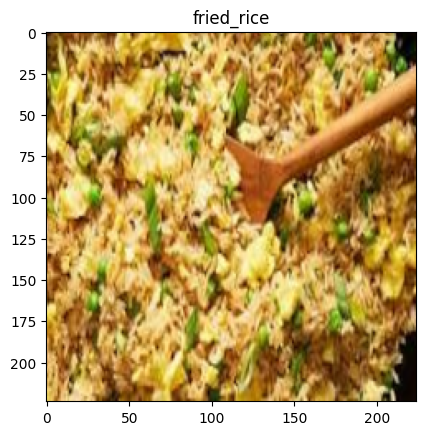

In [76]:
# making the prediction on this data 
path = 'C:/Users/rohit/Downloads/fried_rice.jpg'
models_prediction(file=path , model=loaded_model)

1/1 [==============================] - 0s 25ms/step
['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']


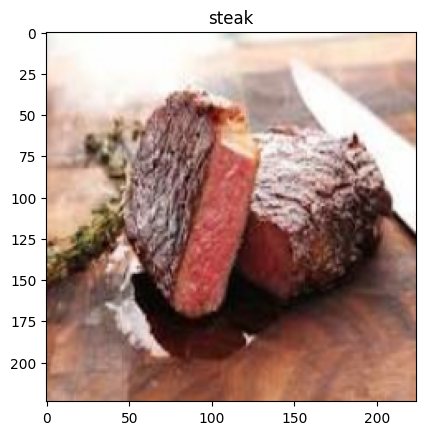

In [78]:
path = 'C:/Users/rohit/Downloads/steak.jpg'
models_prediction(file=path , model=loaded_model)